In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
# image library in python for data visualization
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='-',untar=True)

In [3]:
data_dirc = './/datasets/flower_photos'

In [4]:
import pathlib
# 
data_dirc = pathlib.Path(data_dirc)
data_dirc

WindowsPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dirc.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dirc.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

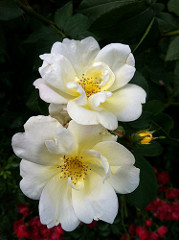

In [8]:
PIL.Image.open(str(roses[0]))

In [22]:
# path dictionary
flowers_images_dict = {
    'roses':list(data_dirc.glob('roses/*')),
    'daisy':list(data_dirc.glob('daisy/*')),
    'dandelion':list(data_dirc.glob('dandelion/*')),
    'sunflowers':list(data_dirc.glob('sunflowers/*')),
    'tulips':list(data_dirc.glob('tulips/*')),
}

In [23]:
flowers_images_dict['daisy']

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [24]:
# label dictionary

flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [25]:
# opencv reads the image and converts it into 3*3 array
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [26]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [15]:
img.shape

(240, 179, 3)

In [27]:
cv2.resize(img,(100,100)).shape

(100, 100, 3)

In [29]:
x,y = [],[]

for flower_name,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(100,100))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [31]:
x[0]

array([[[ 5, 20, 12],
        [ 4, 20, 11],
        [ 5, 21, 10],
        ...,
        [22, 48, 30],
        [21, 47, 30],
        [24, 51, 34]],

       [[13, 20, 13],
        [11, 19, 12],
        [ 7, 21, 10],
        ...,
        [23, 46, 32],
        [21, 44, 29],
        [23, 47, 32]],

       [[12, 22, 14],
        [10, 21, 13],
        [10, 22, 12],
        ...,
        [26, 49, 35],
        [23, 46, 28],
        [21, 45, 25]],

       ...,

       [[ 5, 17,  9],
        [ 7, 15,  8],
        [ 3, 10,  4],
        ...,
        [ 6, 17,  7],
        [ 6, 11,  6],
        [ 1,  3,  2]],

       [[11, 22, 15],
        [12, 21, 11],
        [15, 23, 13],
        ...,
        [ 3, 11,  4],
        [ 7, 15,  8],
        [ 1,  4,  1]],

       [[17, 26, 25],
        [17, 24, 17],
        [16, 23, 13],
        ...,
        [ 1,  9,  2],
        [ 2, 12,  2],
        [ 1,  8,  2]]], dtype=uint8)

In [32]:
y[:5]

[0, 0, 0, 0, 0]

In [34]:
x = np.array(x)
y = np.array(y)

In [35]:
y[:5]

array([0, 0, 0, 0, 0])

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state =0)

In [37]:
len(x_train)

2752

In [38]:
len(x_test)

918

In [39]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [42]:
num_classes = 5

model = Sequential([
#     cnn layers
    
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    
#     dense layers
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='relu'),
    
])


model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(x_train_scaled,y_train,epochs =10)

Epoch 1/10
86/86 [==============================] - 14s 153ms/step - loss: 1.6121 - accuracy: 0.1686
Epoch 2/10
86/86 [==============================] - 13s 152ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 3/10
86/86 [==============================] - 13s 152ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 4/10
86/86 [==============================] - 13s 154ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 5/10
86/86 [==============================] - 13s 152ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 6/10
86/86 [==============================] - 13s 152ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 7/10
86/86 [==============================] - 13s 151ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 8/10
86/86 [==============================] - 13s 154ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 9/10
86/86 [==============================] - 13s 154ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 10/10
86/86 [==============================] - 13s 153ms/step - loss: 1.6094 - accura

In [43]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 35ms/step - loss: 1.6094 - accuracy: 0.1917


[1.609437346458435, 0.1917211264371872]

In [45]:
predictions = model.predict(x_test_scaled)
predictions

29/29 [==============================] - 2s 36ms/step


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0.2, 0.2, 0.2, 0.2, 0.2], dtype=float32)>

In [53]:
np.argmax(np.array([0,78,128,0]))
np.argmax(score)

0

In [54]:
y_test[0]

1

In [79]:
# in order to over come over fitting we use data augmentation

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

NameError: name 'img_height' is not defined

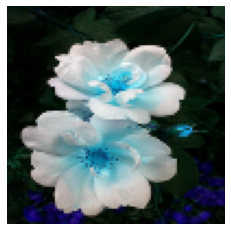

In [67]:
plt.axis('off')
plt.imshow(x[0])

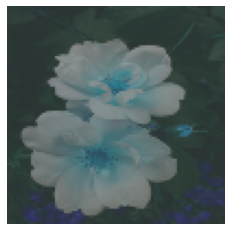

In [71]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))

In [80]:
num_classes = 5

model = Sequential([
    data_augmentation,
#     cnn layers
    
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    
#     dense layers
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='relu'),
    
])


model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(x_train_scaled,y_train,epochs =10)

Epoch 1/10
86/86 [==============================] - 40s 260ms/step - loss: 1.6118 - accuracy: 0.1708
Epoch 2/10
86/86 [==============================] - 22s 252ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 3/10
86/86 [==============================] - 22s 255ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 4/10
86/86 [==============================] - 22s 253ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 5/10
86/86 [==============================] - 22s 252ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 6/10
86/86 [==============================] - 22s 250ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 7/10
86/86 [==============================] - 22s 252ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 8/10
86/86 [==============================] - 22s 251ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 9/10
86/86 [==============================] - 22s 254ms/step - loss: 1.6094 - accuracy: 0.1690
Epoch 10/10
86/86 [==============================] - 22s 258ms/step - loss: 1.6094 - accura

In [82]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 2s 61ms/step - loss: 1.6094 - accuracy: 0.1917


[1.609437346458435, 0.1917211264371872]